In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [60]:
df = pd.read_csv('tcrdock_template_similarities.csv')
df = df.dropna()
df

,system,measurement_type,is_benchmark_mode,similarity,spearmanr,spearmanr_all_points,spearmanr_pval,spearmanr_all_points_pval
0,TCR1,activity,False,0.997,0.02,0.52,0.83,0.00
1,TCR1,activity,True,0.933,-0.03,-0.09,0.77,0.22
2,TCR2,activity,False,0.962,0.13,0.35,0.24,0.00
3,TCR2,activity,True,0.932,0.44,0.40,0.00,0.00
4,TCR3,activity,False,0.938,0.21,0.28,0.03,0.00
5,TCR3,activity,True,0.929,0.11,0.34,0.27,0.00
6,TCR4,activity,False,0.828,0.18,0.31,0.15,0.00
7,TCR4,activity,True,0.816,-0.22,0.14,0.08,0.06
8,TCR5,activity,False,0.963,-0.02,-0.07,0.83,0.33
9,TCR5,activity,True,0.950,0.28,0.34,0.00,0.00


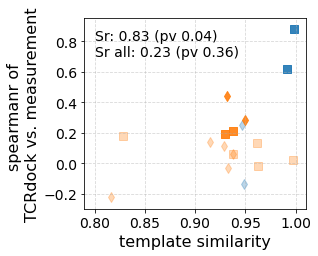

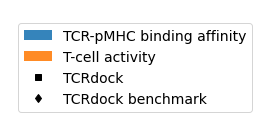

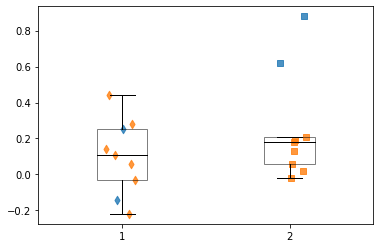

In [109]:
measurement_type_to_color = {
    'affinity': 'tab:blue',
    'activity': 'tab:orange'
}

is_benchmark_to_marker = {
    True: 'd',
    False: 's'
}

is_significant_to_alpha = {
    True: 0.9,
    False: 0.3
}

fontsize = 17

for exp_metric in ['spearmanr']: # , 'spearmanr_all_points']:

    is_significant_array = df[f'{exp_metric}_pval'] < 0.05

    plt.figure(figsize=(4.5, 3.5))

    for measurement_type in ['affinity', 'activity']:
        for is_benchmark in [True, False]:
            for is_significant in [True, False]:
                plt.scatter(df.loc[np.logical_and.reduce([df['measurement_type'] == measurement_type, df['is_benchmark_mode'] == is_benchmark,  is_significant_array== is_significant])]['similarity'],
                            df.loc[np.logical_and.reduce([df['measurement_type'] == measurement_type, df['is_benchmark_mode'] == is_benchmark, is_significant_array == is_significant])][exp_metric],
                            color=measurement_type_to_color[measurement_type],
                            marker=is_benchmark_to_marker[is_benchmark],
                            alpha=is_significant_to_alpha[is_significant],
                            s=50)

    plt.xlabel('template similarity', fontsize=fontsize-1)
    plt.ylabel('spearmanr of \nTCRdock vs. measurement', fontsize=fontsize-1)
    plt.xticks([0.80, 0.85, 0.90, 0.95, 1.00], fontsize=fontsize-3)
    plt.yticks(fontsize=fontsize-3)
    plt.xlim([0.79, 1.01])
    plt.ylim([-0.30, 0.95])
    # plt.title('Spearmanr: %.2f (sig. %.2f)' % (spearmanr(df['similarity'], df[exp_metric])[0], spearmanr(df.loc[is_significant_array]['similarity'], df.loc[is_significant_array][exp_metric])[0]), fontsize=fontsize)
    plt.text(0.80, 0.70, 'Sr: %.2f (pv %.2f)\nSr all: %.2f (pv %.2f)' % (*spearmanr(df.loc[is_significant_array]['similarity'], df.loc[is_significant_array][exp_metric]), *spearmanr(df['similarity'], df[exp_metric])), fontsize=fontsize-3)
    plt.grid(alpha=0.5, ls='--')

    plt.tight_layout()
    plt.savefig('tcrdock_spearmanr_vs_template_similarity.png')
    plt.savefig('tcrdock_spearmanr_vs_template_similarity.pdf')
    plt.show()


    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    
    legend_handles = []
    legend_handles.append(Patch(facecolor=measurement_type_to_color['affinity'], alpha=0.9, label='TCR-pMHC binding affinity'))
    legend_handles.append(Patch(facecolor=measurement_type_to_color['activity'], alpha=0.9, label='T-cell activity'))
    legend_handles.append(Line2D([0], [0], color='black', marker=is_benchmark_to_marker[False], linestyle='None', label='TCRdock'))
    legend_handles.append(Line2D([0], [0], color='black', marker=is_benchmark_to_marker[True], linestyle='None', label='TCRdock benchmark'))


    # put legends in separate figures
    fig_leg_1 = plt.figure(figsize=(4, 2))
    ax_leg_1 = fig_leg_1.add_subplot(111)
    ax_leg_1.legend(handles=legend_handles, fontsize=fontsize-3, loc='center')
    ax_leg_1.axis('off')
    plt.tight_layout()
    plt.savefig('tcrdock_spearmanr_vs_template_similarity__legend.png')
    plt.savefig('tcrdock_spearmanr_vs_template_similarity__legend.pdf')
    plt.show()


    plt.boxplot([df.loc[df['is_benchmark_mode']][exp_metric], df.loc[~df['is_benchmark_mode']][exp_metric]], showfliers=False, widths=0.3, patch_artist=True, boxprops=dict(facecolor='none', alpha=0.5), medianprops=dict(color="black", linewidth=1))
    for i, is_benchmark in enumerate([True, False]):
        for _, row in df.loc[df['is_benchmark_mode'] == is_benchmark].iterrows():
            noise = np.random.uniform(-0.1, 0.1)
            plt.scatter(i+1+noise, row[exp_metric], color=measurement_type_to_color[row['measurement_type']], marker=is_benchmark_to_marker[is_benchmark], alpha=0.8)
    plt.show()    


